# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [0]:
# !pip install wget
# import wget

In [0]:
# wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
# !unzip reviews.zip

In [0]:
# def submission():
#     """remove this function before submission
#     """
#     assert False, "I didn't submit assignment on time!"

In [0]:
# submission()

In [0]:
import sys
print(sys.version)

3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [0]:
!pip install twython

In [0]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
hotelDfRaw = pd.read_csv('reviews.csv', header = None)
hotelDfRaw.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [0]:
hotelDfRaw

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data/ca/3956429/3949020/185992828.html,Woodland Gardens Bed and Breakfast,"""Such a treat to go to the Woodland Gardens B&...",5,positive
1,data/ca/3956429/3949020/168112894.html,Woodland Gardens Bed and Breakfast,"""The first thing you nice when you pull into t...",5,positive
2,data/ca/3956429/3949020/609506248.html,Woodland Gardens Bed and Breakfast,"""My friend and I stayed at this B&B last week....",5,positive
3,data/ca/3956429/3949020/609296519.html,Woodland Gardens Bed and Breakfast,"""What a surprise to find such a wonderful rela...",5,positive
4,data/ca/3956429/3949020/352236414.html,Woodland Gardens Bed and Breakfast,"""A group of us wanted to spend the family day ...",5,positive
...,...,...,...,...,...
2014,data/ca/796987/6210656/659526184.html,Road 121 Motel,"""I read the reviews which seemed cheep and che...",2,negative
2015,data/ca/796987/6210656/515696104.html,Road 121 Motel,"""Room was okay. Bed was fairly comfortable. ...",3,negative
2016,data/ca/796987/6210656/681638034.html,Road 121 Motel,"""ROOM #5\n\nThe Good - Fast, friendly service;...",1,negative
2017,data/ca/796987/6210656/288535737.html,Road 121 Motel,"""I would not recommend staying at this motel. ...",1,negative


In [0]:
grouped = hotelDfRaw.groupby(['hotelName']).filter(lambda x: len(x) > 30)#.filter(lambda x: len(x) > 10)
hotelDf = grouped.loc[grouped.groupby(['hotelName']).ratingScore.filter(lambda x: x.mean() < 5 ).index]
hotelDf.loc[hotelDf.groundTruth == 'positive', 'groundTruth'] = 1
hotelDf.loc[hotelDf.groundTruth == 'negative', 'groundTruth'] = 0

In [0]:
hotelDf = hotelDf.reset_index(drop=True)

In [0]:
hotelDf.hotelName.value_counts()

Peterborough Inn &amp; Suites Hotel                      100
Days Inn and Suites by Wyndham Lindsay                   100
Stillwater on the Lake                                   100
Quality Inn Peterborough                                 100
Holiday Inn Peterborough                                 100
Best Western Plus Otonabee Inn                           100
Comfort Inn &amp; Suites                                 100
Howard Johnson by Wyndham Lindsay                        100
Elmhirst&#39;s Resort                                    100
Super 8 by Wyndham Peterborough                          100
Westwind Inn                                             100
Best Western Plus Cobourg Inn &amp; Convention Centre    100
Comfort Inn Port Hope                                     90
Kent Inn                                                  85
Motel 6 Peterborough                                      70
Comfort Inn Cobourg                                       64
Village Inn of Lakefield

In [0]:
#check empty reviews
hotelDf[hotelDf['reviewColumn'] == ''].index

Int64Index([], dtype='int64')

In [0]:
hotelDf[hotelDf['reviewColumn'].isna()]

,filePath,hotelName,reviewColumn,ratingScore,groundTruth


In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 1700/1700 [00:02<00:00, 818.63it/s]


##Q1. Sentiment Analysis and Aggregation

###(a)

In [0]:
hotelDf['vader'] = reviewDF['vader']
hotelMeanScore = hotelDf.groupby(['hotelName']).mean()
hotelMeanScore.reset_index(inplace=True)

###(b)

In [0]:
hotelMeanScore.sort_values(by='vader', ascending=False).head(5)

,hotelName,ratingScore,groundTruth,vader
16,Stillwater on the Lake,4.970000,0.990000,0.940308
14,Pine Vista Resort,4.693878,0.959184,0.920153
19,Westwind Inn,4.250000,0.800000,0.892692
18,Village Inn of Lakefield,4.389831,0.898305,0.882390
2,Best Western Plus Otonabee Inn,4.350000,0.880000,0.839094


In [0]:
hotelMeanScore.sort_values(by='groundTruth', ascending=False).head(5)

,hotelName,ratingScore,groundTruth,vader
16,Stillwater on the Lake,4.970000,0.990000,0.940308
14,Pine Vista Resort,4.693878,0.959184,0.920153
6,Days Inn and Suites by Wyndham Lindsay,4.670000,0.950000,0.838556
18,Village Inn of Lakefield,4.389831,0.898305,0.882390
2,Best Western Plus Otonabee Inn,4.350000,0.880000,0.839094


In [0]:
hotelMeanScore.sort_values(by='vader', ascending=True).head(5)

,hotelName,ratingScore,groundTruth,vader
0,Admiral Inn &amp; Conference Centre,2.645833,0.375000,0.090758
9,Howard Johnson by Wyndham Lindsay,3.050000,0.420000,0.294749
4,Comfort Inn Cobourg,3.203125,0.437500,0.493953
12,Motel 6 Peterborough,3.471429,0.571429,0.535274
15,Quality Inn Peterborough,3.410000,0.550000,0.599163


In [0]:
hotelMeanScore.sort_values(by='groundTruth', ascending=True).head(5)

,hotelName,ratingScore,groundTruth,vader
0,Admiral Inn &amp; Conference Centre,2.645833,0.375000,0.090758
9,Howard Johnson by Wyndham Lindsay,3.050000,0.420000,0.294749
11,Knights Inn Lindsay,3.171429,0.428571,0.604649
4,Comfort Inn Cobourg,3.203125,0.437500,0.493953
5,Comfort Inn Port Hope,3.255556,0.444444,0.608629


they mostly agree with each other, especially the top and bottom 2.

##Q2. Frequency Analysis

###(a)

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, k=500):
    reviews = hotelDf['reviewColumn'].values
    
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')

    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth','reviewColumn','vader']].join(freqReviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf, k=10000)


In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
topkGroundPos = getTopK(df=finaldf, k=50, label_value=1)
topkGroundNeg = getTopK(df=finaldf, k=50, label_value=0)
topkVaderPos = getTopK(df=finaldf, 
                       k=50, 
                       label_value=0, 
                       label_column='vader', 
                       operation=operator.gt)
topkVaderNeg = getTopK(df=finaldf, 
                       k=50, 
                       label_value=0, 
                       label_column='vader', 
                       operation=operator.lt)

####(i)

In [0]:
topkGroundPos

[('clean', 688),
 ('breakfast', 626),
 ('great', 624),
 ('good', 483),
 ('friendly', 446),
 ('would', 442),
 ('nice', 402),
 ('stayed', 379),
 ('comfortable', 365),
 ('well', 340),
 ('place', 327),
 ('time', 325),
 ('inn', 298),
 ('night', 293),
 ('one', 283),
 ('lake', 278),
 ('area', 268),
 ('pool', 253),
 ('helpful', 241),
 ('nthe', 237),
 ('family', 219),
 ('back', 217),
 ('food', 213),
 ('like', 206),
 ('recommend', 205),
 ('peterborough', 201),
 ('beautiful', 201),
 ('bed', 199),
 ('hot', 193),
 ('service', 191),
 ('could', 188),
 ('front', 187),
 ('two', 185),
 ('beds', 184),
 ('location', 182),
 ('really', 180),
 ('also', 174),
 ('enjoyed', 170),
 ('desk', 167),
 ('excellent', 166),
 ('little', 165),
 ('everything', 165),
 ('small', 164),
 ('definitely', 163),
 ('always', 163),
 ('next', 162),
 ('best', 157),
 ('free', 156),
 ('weekend', 149),
 ('day', 149)]

####(ii)

In [0]:
topkGroundNeg

[('would', 296),
 ('night', 245),
 ('one', 238),
 ('breakfast', 220),
 ('clean', 216),
 ('good', 199),
 ('desk', 175),
 ('front', 161),
 ('stayed', 157),
 ('nice', 153),
 ('bed', 149),
 ('nthe', 146),
 ('like', 137),
 ('place', 133),
 ('could', 131),
 ('get', 128),
 ('bathroom', 117),
 ('inn', 117),
 ('well', 116),
 ('floor', 114),
 ('back', 114),
 ('time', 108),
 ('first', 107),
 ('small', 106),
 ('even', 103),
 ('great', 99),
 ('water', 98),
 ('people', 94),
 ('two', 94),
 ('old', 94),
 ('hot', 90),
 ('also', 90),
 ('tub', 90),
 ('said', 88),
 ('friendly', 88),
 ('check', 88),
 ('price', 87),
 ('area', 87),
 ('food', 85),
 ('comfortable', 84),
 ('next', 84),
 ('beds', 83),
 ('location', 83),
 ('door', 82),
 ('day', 78),
 ('got', 78),
 ('pool', 78),
 ('coffee', 78),
 ('lot', 76),
 ('told', 73)]

The top positive words have 'lake' and 'peterborough' in the list as the place Peterborough has a lot of lakes and the hotel next to the lake could have many reviews contains 'lake'.

###(b)

In [0]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
#tree= chunker.parse(taggedToks)
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, k=500):
    reviews = hotelDf['reviewColumn'].values
    review_pos = hotelDf[hotelDf['groundTruth']==1]['reviewColumn'].values
    review_neg = hotelDf[hotelDf['groundTruth']==0]['reviewColumn'].values

    # Top-k frequent terms
    counter = Counter()
    c_pos = Counter()
    c_neg = Counter()

    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)

    for review in review_pos:
            c_pos.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topkPos = c_pos.most_common(k)

    for review in review_neg:
            c_neg.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topkNeg = c_neg.most_common(k)

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth','reviewColumn']].join(freqReviewDf)
    return topk, topkPos, topkNeg, finaldf

In [0]:
topk_phrase, topk_phrase_pos, topk_phrase_neg, finaldf_phrase = newDataFrameTransformation(hotelDf)

####(i)

In [0]:
topk_phrase_pos[:50]

[('front desk', 62),
 ('hot tub', 53),
 ('great place', 30),
 ('friendli staff', 29),
 ('continent breakfast', 28),
 ('westwind inn', 25),
 ('comfort inn', 24),
 ('kent inn', 24),
 ('pine vista', 21),
 ('next time', 19),
 ('clean staff', 19),
 ('front desk staff', 19),
 ('villag inn', 19),
 ('nthe room', 18),
 ('coffe maker', 18),
 ('next year', 18),
 ('indoor pool', 18),
 ('rice lake', 18),
 ('next day', 17),
 ('first time', 17),
 ('minut drive', 16),
 ('good valu', 15),
 ('queen bed', 15),
 ('night stay', 15),
 ('great stay', 14),
 ('mini fridg', 14),
 ('hotel staff', 14),
 ('beauti view', 14),
 ('great time', 14),
 ('outdoor pool', 14),
 ('great hotel', 13),
 ('main street', 13),
 ('ground floor', 13),
 ('comfort bed', 13),
 ('breakfast room', 13),
 ('pine vista resort', 13),
 ('dine room', 13),
 ('qualiti inn', 12),
 ('free breakfast', 12),
 ('saturday night', 12),
 ('nthe staff', 12),
 ('complimentari breakfast', 11),
 ('great experi', 11),
 ('hot breakfast', 11),
 ('breakfast are

####(ii)

In [0]:
topk_phrase_neg[:50]

[('front desk', 78),
 ('park lot', 21),
 ('hot tub', 21),
 ('next morn', 16),
 ('night stay', 15),
 ('nthe room', 14),
 ('hockey tournament', 13),
 ('next day', 13),
 ('air condition', 12),
 ('second floor', 12),
 ('hot water', 11),
 ('front desk staff', 11),
 ('hot breakfast', 10),
 ('continent breakfast', 10),
 ('doubl bed', 10),
 ('ground floor', 9),
 ('comfort inn', 9),
 ('first room', 9),
 ('hotel room', 9),
 ('first night', 9),
 ('holiday inn', 9),
 ('smoke room', 9),
 ('dine room', 9),
 ('good locat', 8),
 ('credit card', 8),
 ('first floor', 8),
 ('coffe maker', 8),
 ('custom servic', 8),
 ('first time', 8),
 ('port hope', 8),
 ('nthe hotel', 7),
 ('new room', 7),
 ('breakfast area', 7),
 ('hockey team', 7),
 ('front desk clerk', 6),
 ('ice machin', 6),
 ('ac unit', 6),
 ('cigarett smoke', 6),
 ('queen bed', 6),
 ('jacuzzi tub', 6),
 ('nice touch', 6),
 ('second night', 6),
 ('last night', 6),
 ('next time', 5),
 ('front desk ladi', 5),
 ('larg group', 5),
 ('king bed', 5),
 ('

Front desk and hot tub plays major role in both positive and negative reviews, which means they play a very important role in the views of hotels. Front desk is very common among hotel reviews as they are one of the few first hotel staff to meet the customers. Hot tub on the other hand, I could not immagine myself to put it this high in my judgement of hotels. This could be a very locale-specic thing.

##Q3. Mutual Information

###(a)

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
miScoredf = getMI(topk, finaldf)

In [0]:
miScoredf.head(10)

,Word,MI Score
285,dirty,0.026500
3,great,0.022638
296,carpet,0.021738
8,friendly,0.018487
166,told,0.018377
120,peter,0.017827
103,sunny,0.017400
244,smell,0.017306
94,wonderful,0.016480
89,old,0.015829


Dirty, great and friendly are words with sentiment implied while the word carpet also make sence as dirty or sometimes clean carpet is something people really care about. The word told could be because the interaction wth staff in the hotel that leads to a dissapointing result. 

###(b)

In [0]:
miScoredf_phrase = getMI(topk_phrase, finaldf_phrase, label_column='groundTruth')

In [0]:
miScoredf_phrase.head(10)

,Word,MI Score
0,front desk,0.007124
166,cigarett smoke,0.004392
62,air condition,0.004214
87,smoke room,0.004214
76,first room,0.003927
237,hard time,0.003657
220,non smoke room,0.003657
4,park lot,0.003642
37,next year,0.003641
32,villag inn,0.003234


As discussed before, front desk plays major role in defining good or bad hotel, while the smoking, from both cigarett smoke and smoke room, playing an even higher weight if combined. This is very understandable as no matter how great a front desk staff be, entering a room full of cigarett smell will not be pleasant.

##Q4. Pointwise Mutual Information

###(a)

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in [1,0]:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf


def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi


# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],1,label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],0,label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf, topk=topk)

100%|██████████| 8646/8646 [10:23<00:00, 12.78it/s]


In [166]:
finaldf[(finaldf['groundTruth']==1) & (finaldf['oasis']==1)]['reviewColumn']

384    "Sunny and Peter Montgomery run an amazingly t...
388    "Truly an experience not to be missed if you'r...
427    "Sunny and Peter truly have a passion and love...
443    "Sunny and Peter were the perfect hosts. Our r...
444    "After needing to change business travel plans...
462    "Ontario has many wonderful Spas, B & B's, and...
523    "This staff makes it easy to check in and out ...
Name: reviewColumn, dtype: object

In [108]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(5)

,word,pmi
1771,unique,0.341662
1684,winery,0.341662
1810,smoothies,0.341662
1809,oasis,0.341662
1699,favorite,0.341662


In [109]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(5)

,word,pmi
1784,stain,1.239905
1609,brown,1.239905
1614,curtain,1.239905
1461,hairs,1.239905
1714,clock,1.239905


In the positive reviews winery and oasis are very locale-specic. The Peterborough area has a lot of winery nearby as oasis refers to Oasis Pool & Garden Centres, which features 'hot tubs'! So hot tub in Q3 make sense now.

###(b)

In [111]:
pmiposlist_phrase, pmineglist_phrase, pmidf_phrase = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████| 500/500 [00:09<00:00, 50.32it/s]


In [112]:
#Sorted top pmi non phrase for positive reviews
pmiposlist_phrase.sort_values('pmi',ascending=0).head(10)

,word,pmi
58,outdoor pool,0.341662
136,excel valu,0.341662
147,short walk,0.341662
151,help staff,0.341662
162,bedroom cottag,0.341662
249,third year,0.341662
265,lake ontario,0.341662
263,kid klub,0.341662
262,confer room,0.341662
251,march break,0.341662


In [113]:
#Sorted top pmi non phrase for negative reviews
pmineglist_phrase.sort_values('pmi',ascending=0).head(10)

,word,pmi
277,bathroom floor,1.239905
374,non smoke,1.239905
325,bad experi,1.239905
460,hot spot,1.239905
468,hour notic,1.239905
352,major renov,1.239905
457,bed bug,1.239905
412,room number,1.239905
237,hard time,1.239905
411,toilet tank,1.239905


The top negative phrse has a very alarming phrase, bed bug! I heard it is a very big problem in the area.

###(c)

In [0]:
hotelDfTop = hotelDf[hotelDf['hotelName']=='Stillwater on the Lake'].reset_index(drop=True)
hotelDfBot = hotelDf[hotelDf['hotelName']=='Admiral Inn &amp; Conference Centre'].reset_index(drop=True)

In [0]:
topk_top, topHoteldf_word = dataFrameTransformation(hotelDfTop, k=10000)
topk_phrase_top, topk_phrase_pos_top, topk_phrase_neg_top, topHoteldf_phrase = newDataFrameTransformation(hotelDfTop)


topk_bot, botHoteldf_word = dataFrameTransformation(hotelDfBot, k=10000)
topk_phrase_bot, topk_phrase_pos_bot, topk_phrase_neg_bot, botHoteldf_phrase = newDataFrameTransformation(hotelDfBot)

In [116]:
pmiposlistTop, pmineglistTop, pmidfTop = pmiForAllCal(topHoteldf_word, topk=topk_top)
pmiposlist_phraseTop, pmineglist_phraseTop, pmidf_phraseTop = pmiForAllCal(topHoteldf_phrase, topk=topk_phrase_top)

100%|██████████| 500/500 [00:06<00:00, 73.40it/s]


In [117]:
pmiposlistBot, pmineglistBot, pmidfBot = pmiForAllCal(botHoteldf_word, topk=topk_bot)
pmiposlist_phraseBot, pmineglist_phraseBot, pmidf_phraseBot = pmiForAllCal(botHoteldf_phrase, topk=topk_phrase_bot)

100%|██████████| 338/338 [00:04<00:00, 81.97it/s]


In [118]:
pmiposlist_phraseTop.sort_values('pmi',ascending=0).head(20)

,word,pmi
0,hot tub,0.01005
16,next time,0.01005
1,beauti place,0.01005
29,peterborough area,0.01005
28,next stay,0.01005
27,egg benedict,0.01005
25,star rate,0.01005
24,picnic basket,0.01005
23,graciou host,0.01005
22,hot chocol,0.01005


In [147]:
pmineglist_phraseBot.sort_values('pmi',ascending=0).head(20)

,word,pmi
169,non function wi fi,0.470004
193,noisi window,0.470004
176,bathroom sink,0.470004
177,broken hanger,0.470004
178,good element,0.470004
179,mini fridg,0.470004
180,top nthey,0.470004
184,first room,0.470004
185,faulti fridg,0.470004
186,fruit basket,0.470004


The top hotel Stillwater on the Lake has hot tub, delicious food (egg benedict, picnic basket, hot chocol and fantast breakfast)makes people want to come back next time or for next stay.

The bottom hotel Admiral Inn &amp; Conference Centre has not function wifi, noisy window and broken hanger which is definetly not a good sign for a good hotel.



##Q5. General Plots

###(a)Histogram

####(a)

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

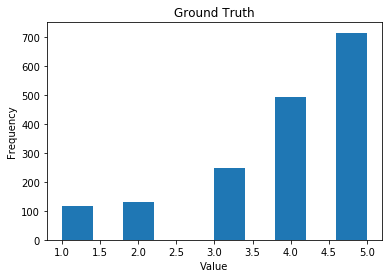

In [121]:
getHistogram('ratingScore', 'Ground Truth')

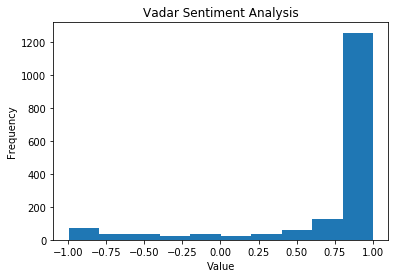

In [122]:
getHistogram('vader', 'Vadar Sentiment Analysis')

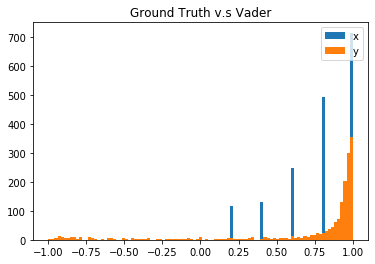

In [123]:
getHistogram('both', 'Ground Truth v.s Vader')

Most reviews are good as all the plots skewed to the right. A good experience tend to have people leave comments.

####(b)

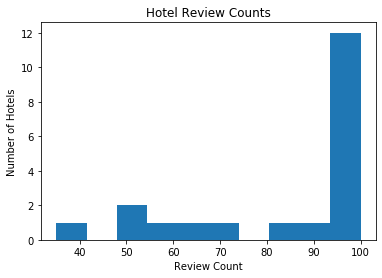

In [124]:
plt.hist(hotelDf.hotelName.value_counts())
plt.title('Hotel Review Counts')
plt.xlabel("Review Count")
plt.ylabel("Number of Hotels")
fig = plt.gcf()


Hotel with good rating tend to get more reviews. As stated before, the more the reviews a hotel has, the better the hotel tend to be. It can resulted from people attracked by good reviews.

###(b)Boxplots

####(a)

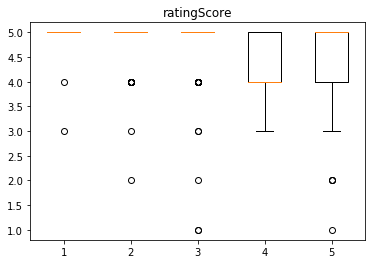

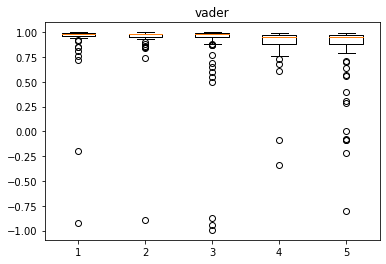

In [125]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
i=1
for conf in ['ratingScore', 'vader']:
  tp5gthotel = hotelMeanScore.sort_values(by=conf, ascending=False).head(5)

  top1 = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['hotelName'].values[0]][conf]
  top2 = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['hotelName'].values[1]][conf]
  top3 = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['hotelName'].values[2]][conf]
  top4 = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['hotelName'].values[3]][conf]
  top5 = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['hotelName'].values[4]][conf]

  data = [top1, top2, top3, top4, top5]
  # multiple box plots on one figure
  x = plt.figure(i)
  plt.boxplot(data)
  plt.title(conf)
  x.show()
  i+=1

####(b)

In [127]:
top5star = hotelMeanScore.sort_values(by='ratingScore', ascending=False).head(5)
hotelDf[hotelDf['hotelName'].isin(top5star['hotelName'].values)].describe().loc[['mean','std']]


,ratingScore,groundTruth,vader,reviewLength
mean,4.627451,0.936275,0.879765,100.514706
std,0.696380,0.244563,0.274353,99.888782


####(c)

The boxplot is much more informative as it not only reports the mean and variance, but also the maximum, minimum, 95% confidence interval and also the overall distribution of the data points.

###(c)Scatterplots and heatmaps

####(a)

Text(0.5, 0, 'Vader Score')

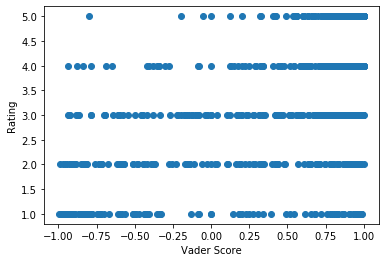

In [128]:
y = hotelDf['ratingScore'].values
x = hotelDf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

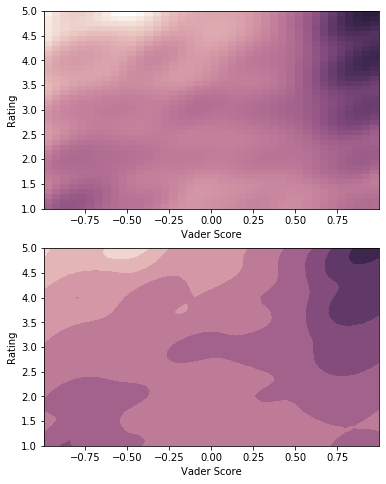

In [130]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

The scatter plot shows that the vader score is closer to the actual rating in higher ratings, like 4 or 5 stars.
The heatmap shows that even though vader score thinks some rating has really high positive emotion, the actual rating is lower than its prediction. While the negative ratings tend to has higher than expected vader scores.
Positives are much higher correlated than negatives.

####(b)

In [0]:
hotelDf['reviewLength'] = hotelDf['reviewColumn'].str.split().str.len()

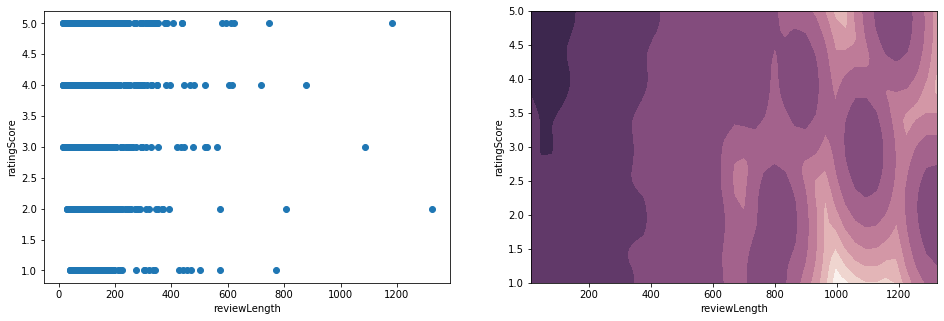

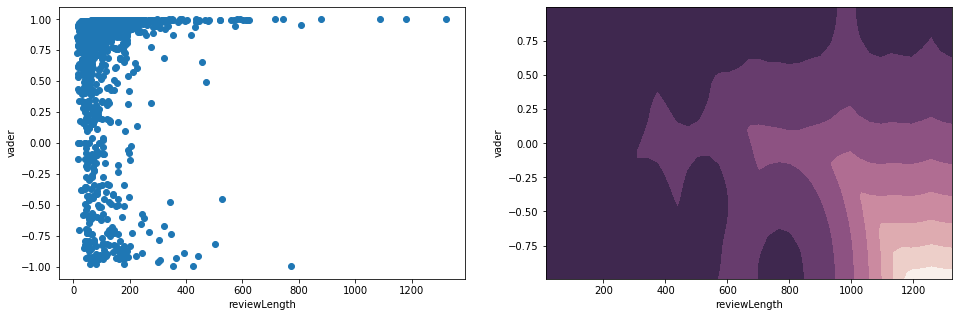

In [132]:
i=1
for rate in ['ratingScore', 'vader']:
  y = hotelDf[rate].values
  x = hotelDf['reviewLength'].values
  fig = plt.figure(i,figsize=(16,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.plot(x, y,"o")
  ax1.set_ylabel(rate)
  ax1.set_xlabel('reviewLength')
  
  k = gaussian_kde(np.vstack([x, y]))
  xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
  zi = k(np.vstack([xi.flatten(), yi.flatten()]))
  cmap = sns.cubehelix_palette(light=1, as_cmap=True)

  ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

  ax2.set_xlim(x.min(), x.max())
  ax2.set_ylim(y.min(), y.max())


  ax2.set_xlabel('reviewLength')
  ax2.set_ylabel(rate)

  i+=1

It can be seen that the longer a review is , the more likely it has a good vader score, while in the ground truth, good reviews tend to have less word. This could be because a very long review could have many words that get the vader score higher.

####(c)

In [0]:
hotelMeanScore['reviewCount'] = hotelDf.hotelName.value_counts().values

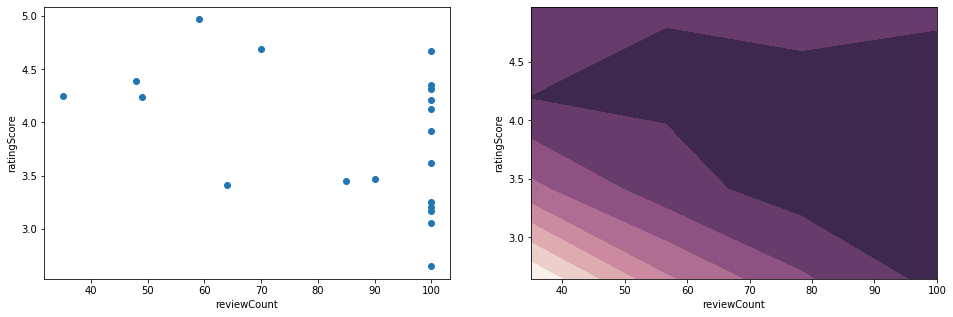

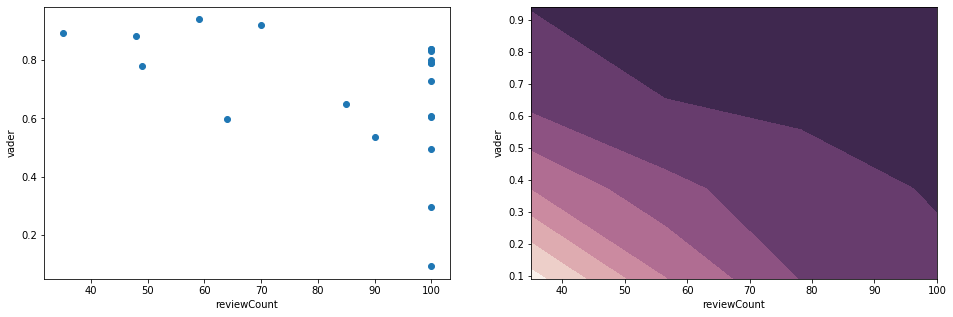

In [134]:
i=1
for rate in ['ratingScore', 'vader']:
  y = hotelMeanScore[rate].values
  x = hotelMeanScore['reviewCount'].values
  fig = plt.figure(i,figsize=(16,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.plot(x, y,"o")
  ax1.set_ylabel(rate)
  ax1.set_xlabel('reviewCount')
  
  k = gaussian_kde(np.vstack([x, y]))
  xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
  zi = k(np.vstack([xi.flatten(), yi.flatten()]))
  cmap = sns.cubehelix_palette(light=1, as_cmap=True)

  ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

  ax2.set_xlim(x.min(), x.max())
  ax2.set_ylim(y.min(), y.max())


  ax2.set_xlabel('reviewCount')
  ax2.set_ylabel(rate)

  i+=1

High review count could result in a wide range of rating and vader scores, but low review count has very high correlation with high rating and vader scores. Given the hotels with avgerage of 5 stars have been filtered out during data preprocessing. This could be because some not very big hotels provide very good service with personal touch.